In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## train.csv
PRODUCT_ID : 제품의 고유 ID  
Y_Class : 제품 품질 상태(Target)   
0 : 적정 기준 미달 (부적합)  
1 : 적합  
2 : 적정 기준 초과 (부적합)  
Y_Quality : 제품 품질 관련 정량적 수치  
TIMESTAMP : 제품이 공정에 들어간 시각  
LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304','T100306' 'T010306', 'T010305' 존재)   
PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)  
X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수  

In [ ]:
"""

  Label : Y_Quality
  Samples : Product_code , x_n, Line, timestamp

  Y_Class :  Y_Quality
  class 0 : ~ 0.525067
  class 1 : 0.530253 ~ 0.534843
  class 2 : 0.534843 ~ 
  
"""
product_lst = ['A_31','T_31','O_31']
line_lst = ['T050304', 'T050307', 'T100304','T100306' ,'T010306', 'T010305']


quality_df = train_df.loc[:,['Y_Class','Y_Quality']]
quality_group = quality_df.groupby('Y_Class').describe()
quality_group.head()

Y_Quality                                                              \
            count      mean       std       min       25%       50%       75%   
Y_Class                                                                         
0            88.0  0.520837  0.004603  0.500856  0.519440  0.522054  0.524113   
1           407.0  0.530253  0.002444  0.525086  0.528378  0.530308  0.532129   
2           103.0  0.542031  0.008038  0.534951  0.536354  0.538508  0.546555   

                   
              max  
Y_Class            
0        0.525067  
1        0.534843  
2        0.578841

In [ ]:
train_df.describe().max()

Y_Class      598.0
Y_Quality    598.0
X_1          349.0
X_2          349.0
X_3          349.0
             ...  
X_2871        99.0
X_2872         0.0
X_2873         0.0
X_2874         0.0
X_2875         0.0
Length: 2877, dtype: float64

In [ ]:
columns_list = train_df.columns.tolist()
print(columns_list)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_92', 'X_93', 'X_94', 'X_95', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_113', 'X_114', 'X_115

In [ ]:
"""
  X_~에 해당하는 비식별화 된 변수가 어떠한 train에도 없는 경우
  count가 0인 X 변수 제거
"""
count_0 = []
for column in columns_list:
  if train_df[column].count() == 0.0:
    count_0.append(column)
print("Count 0 columns : ", count_0)
print("Size of count 0 columns : ", len(count_0))

train_nonzero_df = train_df.drop(count_0,axis = 1)
test_nonzero_df = test_df.drop(count_0, axis = 1)
train_nonzero_df.describe()

print("Dataframe shape : \n\tRow Size : {}\n\tColumn SIze : {}".format(train_nonzero_df.shape[0], train_nonzero_df.shape[1]))

Count 0 columns :  ['X_934', 'X_935', 'X_936', 'X_937', 'X_2628', 'X_2629', 'X_2630', 'X_2631', 'X_2632', 'X_2633', 'X_2634', 'X_2635', 'X_2636', 'X_2637', 'X_2638', 'X_2639', 'X_2640', 'X_2641', 'X_2642', 'X_2643', 'X_2644', 'X_2645', 'X_2646', 'X_2647', 'X_2648', 'X_2649', 'X_2650', 'X_2651', 'X_2652', 'X_2653', 'X_2654', 'X_2655', 'X_2656', 'X_2657', 'X_2658', 'X_2659', 'X_2660', 'X_2661', 'X_2662', 'X_2663', 'X_2664', 'X_2665', 'X_2666', 'X_2667', 'X_2668', 'X_2669', 'X_2670', 'X_2671', 'X_2672', 'X_2673', 'X_2674', 'X_2675', 'X_2676', 'X_2677', 'X_2678', 'X_2679', 'X_2680', 'X_2681', 'X_2682', 'X_2683', 'X_2684', 'X_2685', 'X_2686', 'X_2687', 'X_2688', 'X_2689', 'X_2690', 'X_2691', 'X_2692', 'X_2693', 'X_2694', 'X_2695', 'X_2696', 'X_2697', 'X_2698', 'X_2699', 'X_2838', 'X_2844', 'X_2872', 'X_2873', 'X_2874', 'X_2875']
Size of count 0 columns :  82
Dataframe shape : 
	Row Size : 598
	Column SIze : 2799


#Product Code 기준으로 비식별화 변수 분석

In [ ]:
"""
  PRODUCT_CODE를 기준으로 데이터 describe
"""
code_df = train_nonzero_df.drop(['Y_Quality','Y_Class','LINE','TIMESTAMP','PRODUCT_ID'],axis = 1)
code_df = code_df.groupby('PRODUCT_CODE').count()
name_list = code_df.columns.tolist()
code_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
PRODUCT_CODE,,,,,,,,,,,,,,,,,,,,,
A_31,0,0,0,0,0,0,0,0,0,0,...,249,249,249,249,100,100,100,100,100,99
O_31,6,6,6,6,6,6,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0
T_31,343,343,343,343,343,343,343,343,343,343,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
code_df.loc['A_31'].dropna()

X_1         0
X_2         0
X_3         0
X_4         0
X_5         0
         ... 
X_2867    100
X_2868    100
X_2869    100
X_2870    100
X_2871     99
Name: A_31, Length: 2793, dtype: int64

In [ ]:
product_code_df = [code_df.loc[df].tolist() for df in product_lst]
product_len = len(product_code_df)

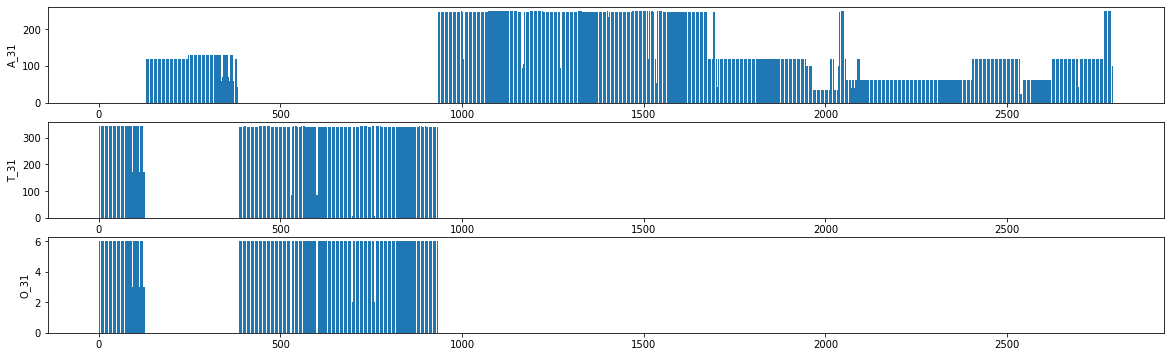

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(3,1,1)
plt.ylabel('A_31')
plt.bar(range(len(name_list)),code_df.loc['A_31'])

plt.subplot(3,1,2)
plt.ylabel('T_31')
plt.bar(range(len(name_list)),code_df.loc['T_31'])

plt.subplot(3,1,3)
plt.ylabel('O_31')
plt.bar(range(len(name_list)),code_df.loc['O_31'])
plt.show()

#Line Code 기준

In [ ]:
"""
  PRODUCT_CODE를 기준으로 데이터 describe
"""
code_df = train_nonzero_df.drop(['Y_Quality','Y_Class','PRODUCT_CODE','TIMESTAMP','PRODUCT_ID'],axis = 1)
code_df = code_df.groupby('LINE').count()
code_df.head()
name_list = code_df.columns.tolist()

In [ ]:
line_code_df = [code_df.loc[df].tolist for df in line_lst]
line_len = len(line_code_df)

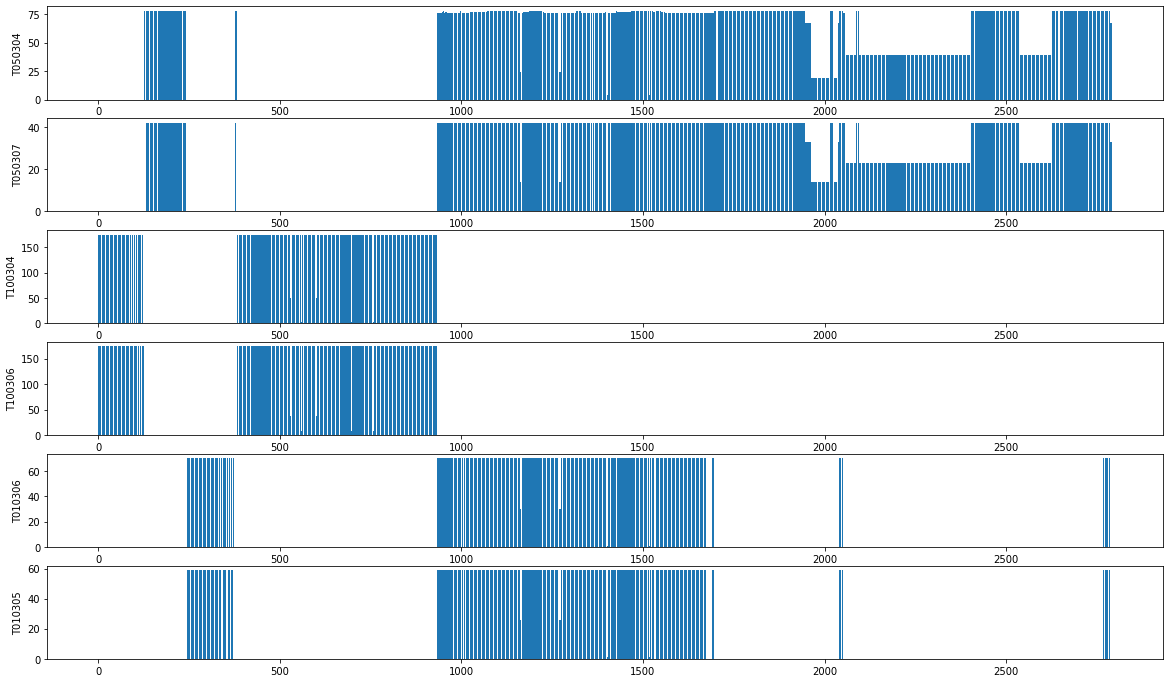

In [ ]:
plt.figure(figsize=(20,12))
for idx, li in enumerate(line_lst):
  plt.subplot(6,1,idx+1)
  plt.ylabel(li)
  plt.bar(range(len(name_list)),code_df.loc[li])
plt.show()

#DL Class

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim, num_layers,dropout):
    super(LSTM,self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers
    self.dropout = dropout

    self.lstm = nn.LSTM(input_size = input_dim, 
                        hidden_size = hidden_dim,
                        num_layers = num_layers,
                        bias = True,
                        dropout = self.dropout,
                        batch_first = True)
    self.linear = nn.Linear(hidden_dim, output_dim)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()

  def forward(self, x):
    h_0 = torch.zeros(x.size(0), self.hidden_dim)
    c_0 = torch.zeros(x.size(0), self.hidden_dim)
    
    out, (hn, cn) = self.lstm(x)
    out = self.relu(hn)
    out = out[0].view(-1, self.hidden_dim) # flatten
    out = self.linear(out)
    return out


In [ ]:
train_dfs = train_nonzero_df.drop(['PRODUCT_ID','TIMESTAMP','Y_Class'],axis = 1).dropna()
ans_df = train_nonzero_df['Y_Class'])
for idx , pro in enumerate(product_lst):
  train_dfs.loc[train_dfs['PRODUCT_CODE'] == pro ,'PRODUCT_CODE'] = idx+1
for idx , li in enumerate(line_lst):
  train_dfs.loc[train_dfs['LINE'] == li, 'LINE'] = idx + 1
train_dfs.head()

SyntaxError: ignored

In [ ]:
train_dfs = train_dfs.fillna(-1)
test_dfs = test_dfs.fillna(-1)

In [ ]:
train_dfs.head()

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,0.533433,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,-1.0
1,0.541819,2,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,-1.0
2,0.531267,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,-1.0
3,0.537325,2,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,-1.0
4,0.531590,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,-1.0


In [ ]:
train_X = torch.FloatTensor(train_dfs.drop(['Y_Quality'], axis = 1).values).view(-1,1,2795)
train_y = torch.FloatTensor(train_dfs['Y_Quality'].values)
test_X = train_X[400:]
test_y = train_y[400:]
train_X = train_X[:400]
train_y = train_y[:400]

print("train_X shape : {} train_y shape : {}".format(train_X.shape, train_y.shape))

train_X shape : torch.Size([400, 1, 2795]) train_y shape : torch.Size([400])


In [ ]:
"""
  product_code_df -> list of product code dataframe
  line_code_df -> list of line code dataframe
"""
"""product code hyperparameters"""
input_size = 2795
hidden_size = 256
output_size = 1
lr = 0.01
num_epochs = 500

print("Input size : {}\nOutput size : {}\n".format(input_size, output_size))

Input size : 2795
Output size : 1



In [ ]:
model = LSTM(input_size, output_size, hidden_size,1,0)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [ ]:
for epoch in range(num_epochs+1):
  outputs = model.forward(train_X) # 전방향 학습
  optimizer.zero_grad()
  loss = criterion(outputs, train_y) # 오차 계산
  loss.backward() # 기울기 계산
      
  optimizer.step() # 오차 업데이트
  if epoch % 100 == 0:
    print(f'epoch: {epoch}  loss : {loss.item():1.10f}')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([400])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0  loss : 0.4549855888
epoch: 100  loss : 0.0000957728
epoch: 200  loss : 0.0000872131
epoch: 300  loss : 0.0000591903
epoch: 400  loss : 0.0000565485
epoch: 500  loss : 0.0000553125


[1 1 1 1 1 0 1 1 1 1 2 0 1 1 2 2 2 2 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 2
 2 0 1 0 0 0 0 1 0 1 0 0 2 2 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 2 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 2 1 2 1 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 2 2 0 1 1 1 2 2 2 2 0 2 0 2 1 1 1 1 2 2 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 1 1 2 2]
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 2 0
 1 1 1 0 0 1 1 2 1 1 1 1 1 1 1 1 0 0 1 1 1 1 2 2 1 0 1 1 1 1 1 1 2 1 1 0 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 2 2 1 0 1 0 2 2 2 1 0 0 0 1 2 1 2 1 1 1 1 1 2 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 1]
26.262626262626267 %


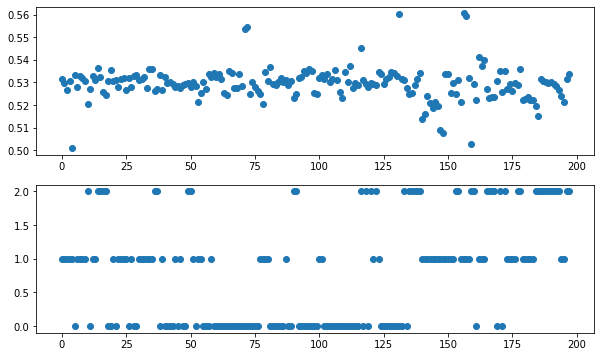

In [ ]:
"""

  Label : Y_Quality
  Samples : Product_code , x_n, Line, timestamp

  Y_Class :  Y_Quality
  class 0 : ~ 0.525067
  class 1 : 0.530253 ~ 0.534843
  class 2 : 0.534843 ~ 
  
"""
with torch.no_grad():
  correct = 0
  for epoch in range(num_epochs + 1):
    outputs = model(test_X)
  predict_np = outputs.numpy()
  actual_np = test_y.numpy()
  actual_class = ans_df[400:].values
  pred_lst = []
  for i in predict_np:
    if i > 0.534843:
      pred_lst.append(2)
    elif i < 0.530253:
      pred_lst.append(0)
    else:
      pred_lst.append(1)
  
  score = 0
  predict_np = np.array(pred_lst)
  for i in range(len(predict_np)):
    if predict_np[i] == actual_class[i]:
      score +=1
  print(predict_np)
  print(actual_class)
  print(score / len(predict_np) * 100, "%")

  plt.figure(figsize=(10,6))
  plt.subplot(2,1,1)
  plt.scatter(range(len(actual_np)), actual_np)

  plt.subplot(2,1,2)
  plt.scatter(range(len(actual_np)), predict_np)
  plt.show()
  
